In [110]:
import os
import sys
import datetime
from collections import defaultdict
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [111]:
from IPython.core.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

In [112]:
data_dir = "./data"
data_files = [f for f in os.listdir(data_dir) if f.endswith("csv")]
print(data_files)

['google_trends.csv', 'tidy_fred.csv', 'umich_exp.csv', 'us_pau_claims.csv']


In [ ]:
full_df = None
for f in data_files:
  print(f)
  df = pd.read_csv(os.path.join(data_dir, f))
  print(df[df.columns[:2]].tail(1))
  if full_df is None:
    full_df = df
  else:
    full_df = full_df.merge(df, on="date", how="outer", )
  print(full_df["date"].max())
full_df.sort_values(by="date", inplace=True)
full_df['date'] = pd.to_datetime(full_df['date'])
full_df.set_index("date", inplace=True)

In [151]:
full_df.sort_index(ascending=False, inplace=True)
full_df.head(2)
ycol = 'PAYEMS:Total Nonfarm'
cols = [full_df.columns[0], ycol]
full_df[cols].head(25)

,amazon jobs work from home near me,PAYEMS:Total Nonfarm
date,,
2021-05-02,0.0,NaN
2021-04-25,11.0,NaN
2021-04-24,NaN,NaN
2021-04-18,22.0,NaN
2021-04-17,NaN,NaN
2021-04-11,0.0,NaN
2021-04-10,NaN,NaN
2021-04-04,0.0,NaN
2021-04-03,NaN,NaN


In [152]:
# create predict frame


last_yval = None
rowdict = defaultdict(lambda: None)
rowdict[ycol] = None
rows = []
for i,(index, ser) in enumerate(full_df.iterrows()):
  print(i)
  if not np.isnan(ser[ycol]):
    print("{0}, {1}, {2}".format(i, index, ser[ycol]))
    rows.append(rowdict)
    rowdict = defaultdict(lambda: None)
    rowdict[ycol] = ser[ycol]
    break
  for xcol in list(ser.index):
    if xcol == ycol:
      continue
    #print("--{0}--".format(xcol))
    if not np.isnan(ser[xcol]):
      if rowdict[xcol] is not None:
        #print("  {0}: {1}".format(xcol, rowdict[xcol]))        
        rowdict[xcol] = ser[xcol]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
19, 2021-03-01 00:00:00, 144120.0


In [136]:
ser.index

Index(['amazon jobs work from home near me', 'work from home jobs amazon',
       'jobs', 'jobs near me hiring', 'indeed resume search',
       'places hiring near me part time', 'work from home jobs',
       'job hiring near me', 'indeed resume', 'places hiring near me',
       'amazon work from home', 'jobs hiring part time near me',
       'jobs work from home', 'hiring jobs near me', 'indeed jobs near me',
       'work from home', 'jobs near me', 'indeed jobs', 'work',
       'part time jobs near me', 'indeed jobs hiring near me',
       'jobs hiring near me part time', 'diff', 'PAYEMS:Total Nonfarm',
       'JTS1000JOL: Job Openings: Total Private',
       'JTS1000HIL:  Hires: Total Private ',
       'JTS1000TSL:  Total Separations: Total Private ',
       'CSCICP03USM665S: OECD US Consumer Confidence',
       'BSCICP03USM665S: OECD Business Confidence',
       'UNRATE: Unemployment Rate', 'NPPTTL: ADP',
       'UNEMPLOY: Unemployment Level', 'CLF16OV: Civilian Labor Force',
     

In [98]:
ff_df = full_df.copy()
def forward_fill(df):
  cdf = df.copy()
  cols = df.columns
  for col in cols:
    last_val = None
    for index, value in df[col].iteritems():
      if value == 0:
        cdf[index, col] = last_val
      else:
        last_val = value
  return cdf
ff_df = forward_fill(full_df)
ff_df = full_df.ffill()
ff_df.columns
ff_df.tail(3)

,date,amazon jobs work from home near me,work from home jobs amazon,jobs,jobs near me hiring,indeed resume search,places hiring near me part time,work from home jobs,job hiring near me,indeed resume,...,LNS12032194: Part-Time for Econ Reasons,ICSA: Initial Claims,CCSA: Continued Claims,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,PUA IC,PUA CC,PEUC CC
995,2021-04-24,22.0,8.0,63.0,58.0,12.0,23.0,47.0,62.0,46.0,...,5826.0,553000.0,3660000.0,118.0,108.0,94.0,79.7,121749.0,6974909.0,5194099.0
102,2021-04-25,11.0,14.0,62.0,63.0,12.0,34.0,46.0,39.0,28.0,...,5826.0,553000.0,3660000.0,118.0,108.0,94.0,79.7,121749.0,6974909.0,5194099.0
103,2021-05-02,0.0,14.0,62.0,65.0,0.0,0.0,49.0,42.0,39.0,...,5826.0,553000.0,3660000.0,118.0,108.0,94.0,79.7,121749.0,6974909.0,5194099.0


['amazon jobs work from home near me', 'work from home jobs amazon', 'jobs', 'jobs near me hiring', 'indeed resume search', 'places hiring near me part time', 'work from home jobs', 'job hiring near me', 'indeed resume', 'places hiring near me', 'amazon work from home', 'jobs hiring part time near me', 'jobs work from home', 'hiring jobs near me', 'indeed jobs near me', 'work from home', 'jobs near me', 'indeed jobs', 'work', 'part time jobs near me', 'indeed jobs hiring near me', 'jobs hiring near me part time', 'diff', 'PAYEMS:Total Nonfarm', 'JTS1000JOL: Job Openings: Total Private', 'JTS1000HIL:  Hires: Total Private ', 'JTS1000TSL:  Total Separations: Total Private ', 'CSCICP03USM665S: OECD US Consumer Confidence', 'BSCICP03USM665S: OECD Business Confidence', 'UNRATE: Unemployment Rate', 'NPPTTL: ADP', 'UNEMPLOY: Unemployment Level', 'CLF16OV: Civilian Labor Force', 'UEMP27OV: Unemployed for 27 Weeks', 'USPRIV: BLS private', 'U6Rate: Unemployed plus Marginally Attached ', 'CIVPART

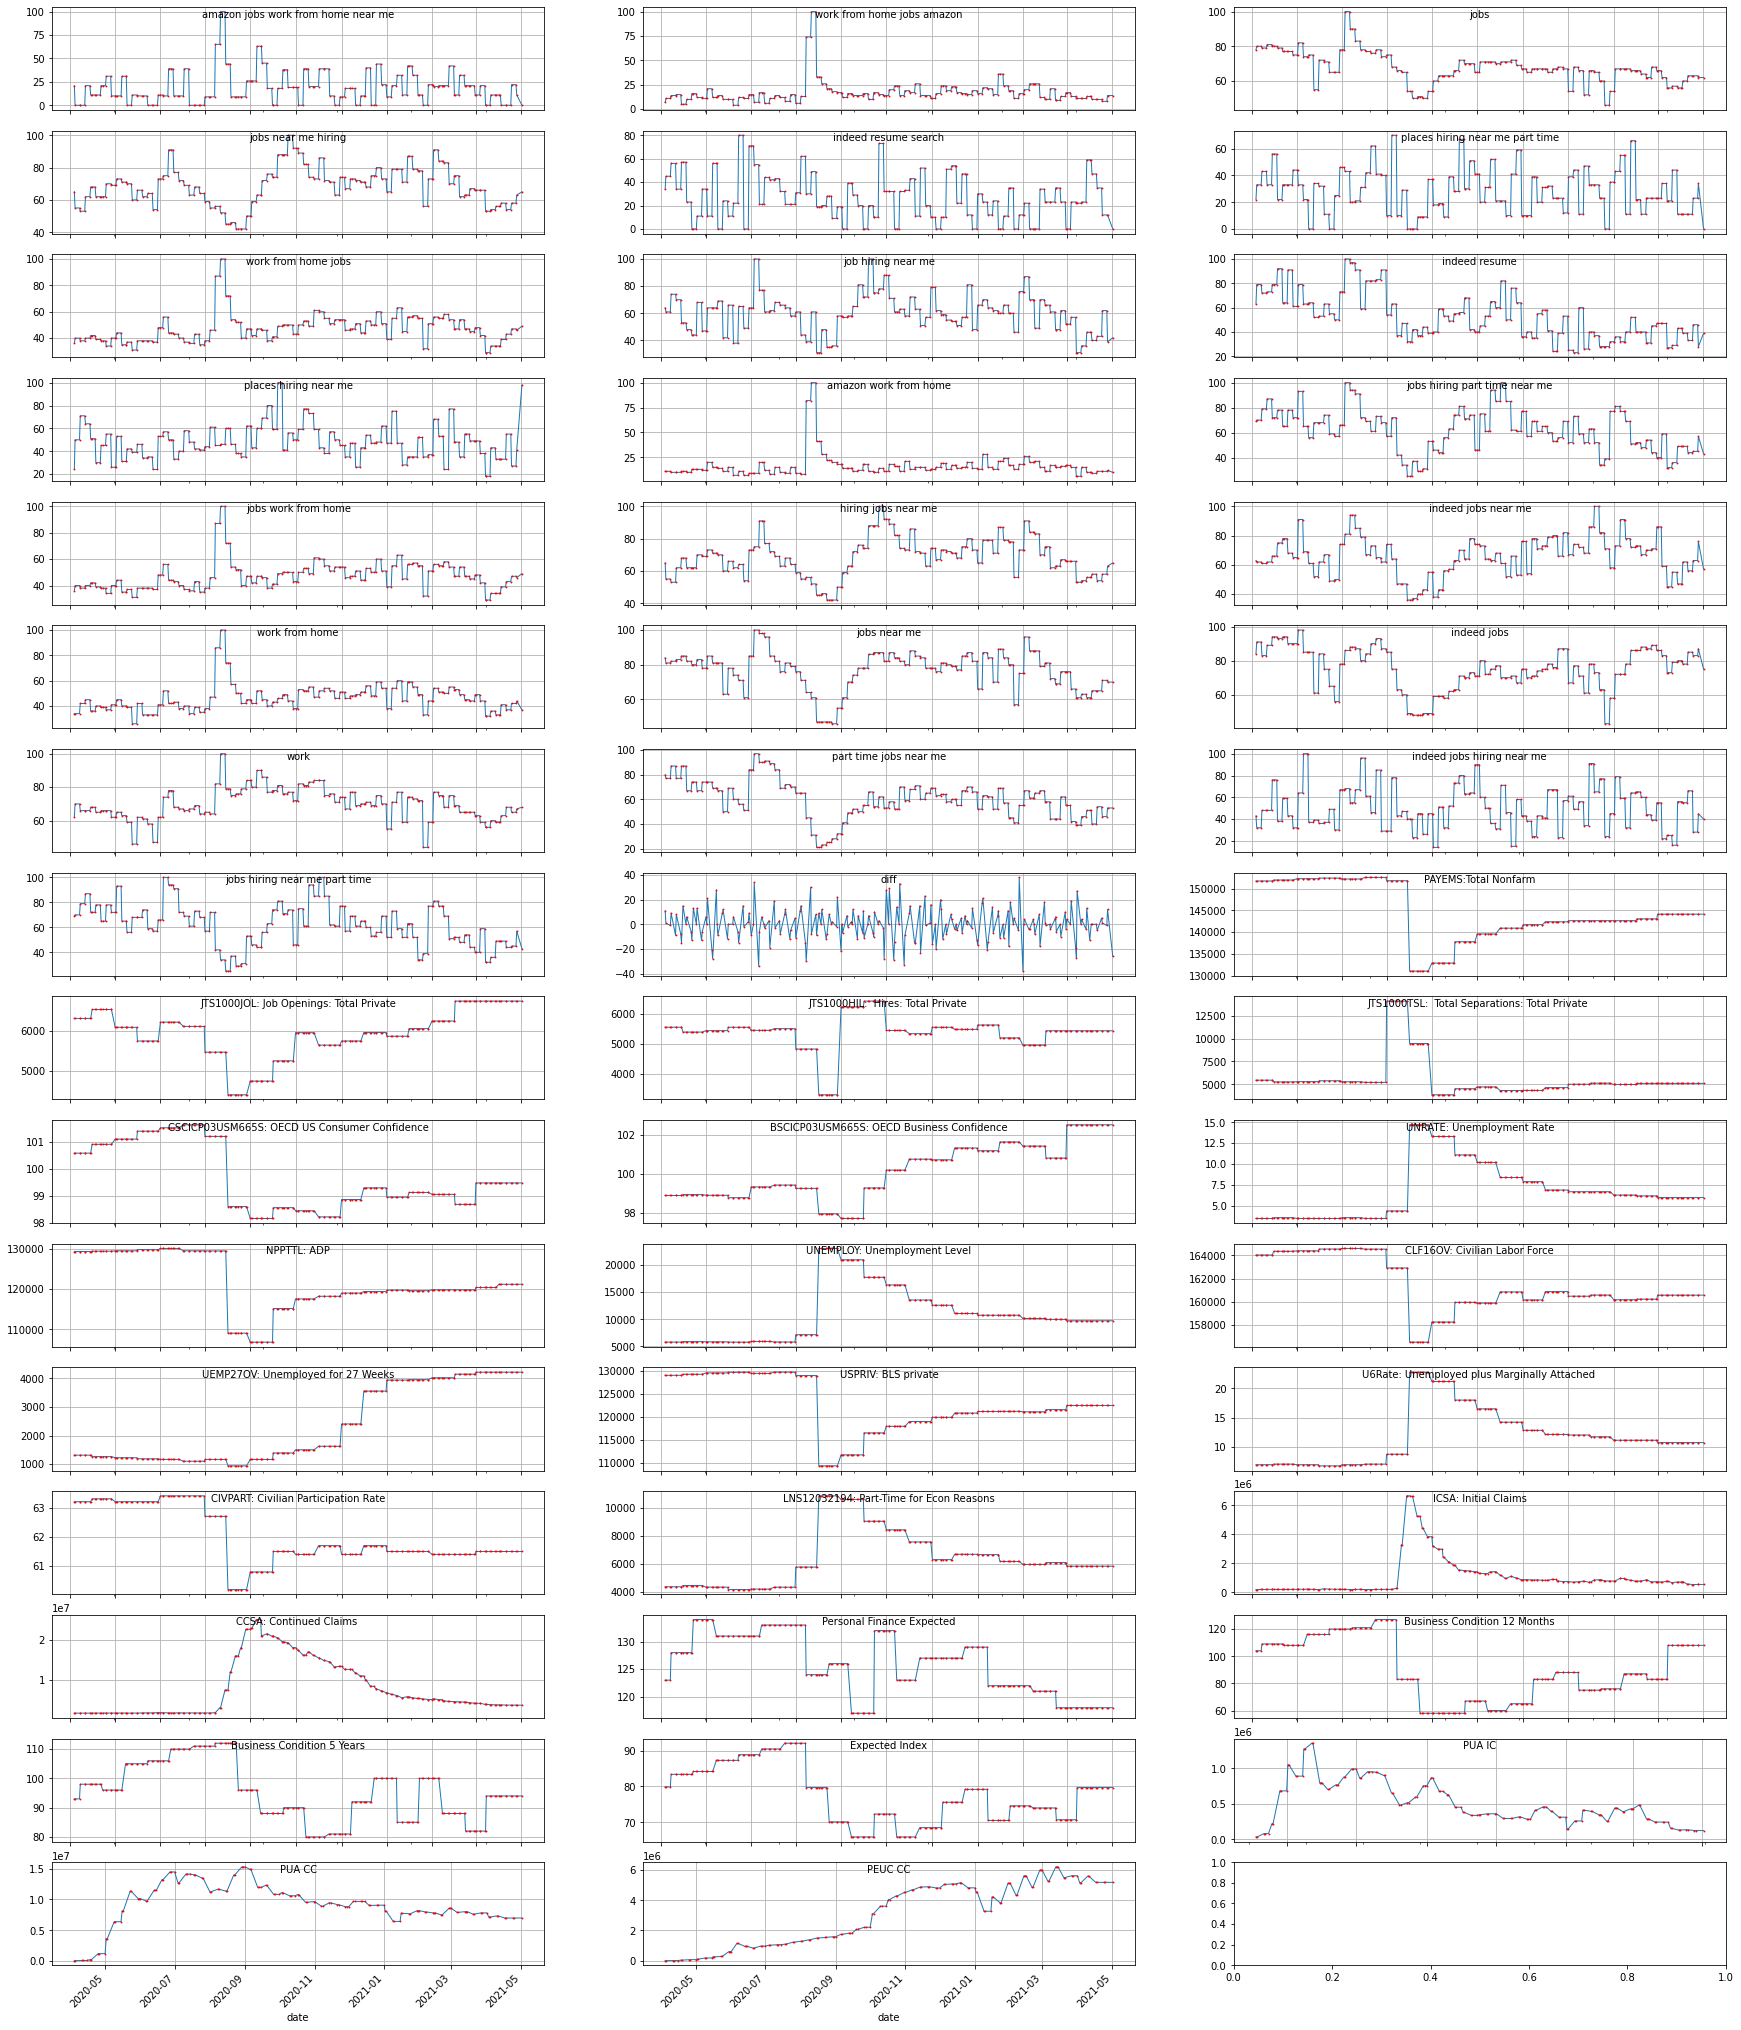

In [102]:
xcol = "date"
title = "title"
df = ff_df.copy()
#df.set_index("date", inplace=True)
ycols = [c for c in ff_df.columns if c != "date"]
print(ycols)
sharex = False
ncols=3
figwd=30
fight=40
xtick_rot = 45
ylim=(None, None)
nrows = int(np.ceil(len(ycols)/float(ncols)))
fig = None
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[figwd, fight], sharex=sharex)  
print(axs.shape)
for i, ycol in enumerate(ycols):
  if ycol == "date":
    continue
  row = i // ncols
  col = i % ncols
  ax = axs[row][col]  
  #print(ycol)
  df["diff"]  = df[ycol].diff()
  df.iloc[-200:].plot(ax=ax, kind='line', x=xcol, y=ycol,linestyle='-', marker='o', lw=1, ylim=ylim,
                   mec='red', mfc='black', ms=0.85,  title=None, legend=None, label=None, grid=True, sharex=True)

  ax.text(.5,.9, ycol,
        horizontalalignment='center',
        transform=ax.transAxes)  
    
  ax.xaxis.set_tick_params(rotation=xtick_rot)     

plt.show()